<a href="https://colab.research.google.com/github/indrawanth/ComputerVision_Car_Detection_YOLOv8/blob/main/Object_Detection_Car_using_YOLO_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECT DETECTION CAR

# USING YOLO v8

# 2502481043

# INDRAWAN HADIANTO

# 🚛 🚗 🚛 🚗 🚛 🚗 🚛 🚗

1. SETTING ENVIRONTMENT

In [ ]:
!nvidia-smi

Thu Mar 27 12:22:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

import roboflow


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.7 MB/s eta 0:00:00


2. IMPORT DATASET DARI LOCAL LAPTOP

In [ ]:
from google.colab import files
files.upload()

Saving cardetect.yolov8.zip to cardetect.yolov8.zip


In [ ]:
!unzip -q /content/datasets/cardetect.yolov8.zip -d /content/car_detect

3. TRAINING DATA

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/car_detect/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 325MB/s]
New https://pypi.org/project/ultralytics/8.3.97 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/car_detect/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

5. VALIDASI DATA

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=yolov8s.pt data=/content/car_detect/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/car_detect/valid/labels.cache... 500 images, 0 backgrounds, 0 corrupt: 100% 500/500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 32/32 [00:10<00:00,  3.19it/s]
                   all        500       8252     0.0467      0.364     0.0309     0.0125
                person        495       5100     0.0451       0.31     0.0302     0.0118
               bicycle        499       2371     0.0819      0.123     0.0472     0.0171
                   car        500        781     0.0131      0.658     0.0153    0.00868
Speed: 0.6ms preprocess, 9.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


4. EVALUASI MODEL

/content


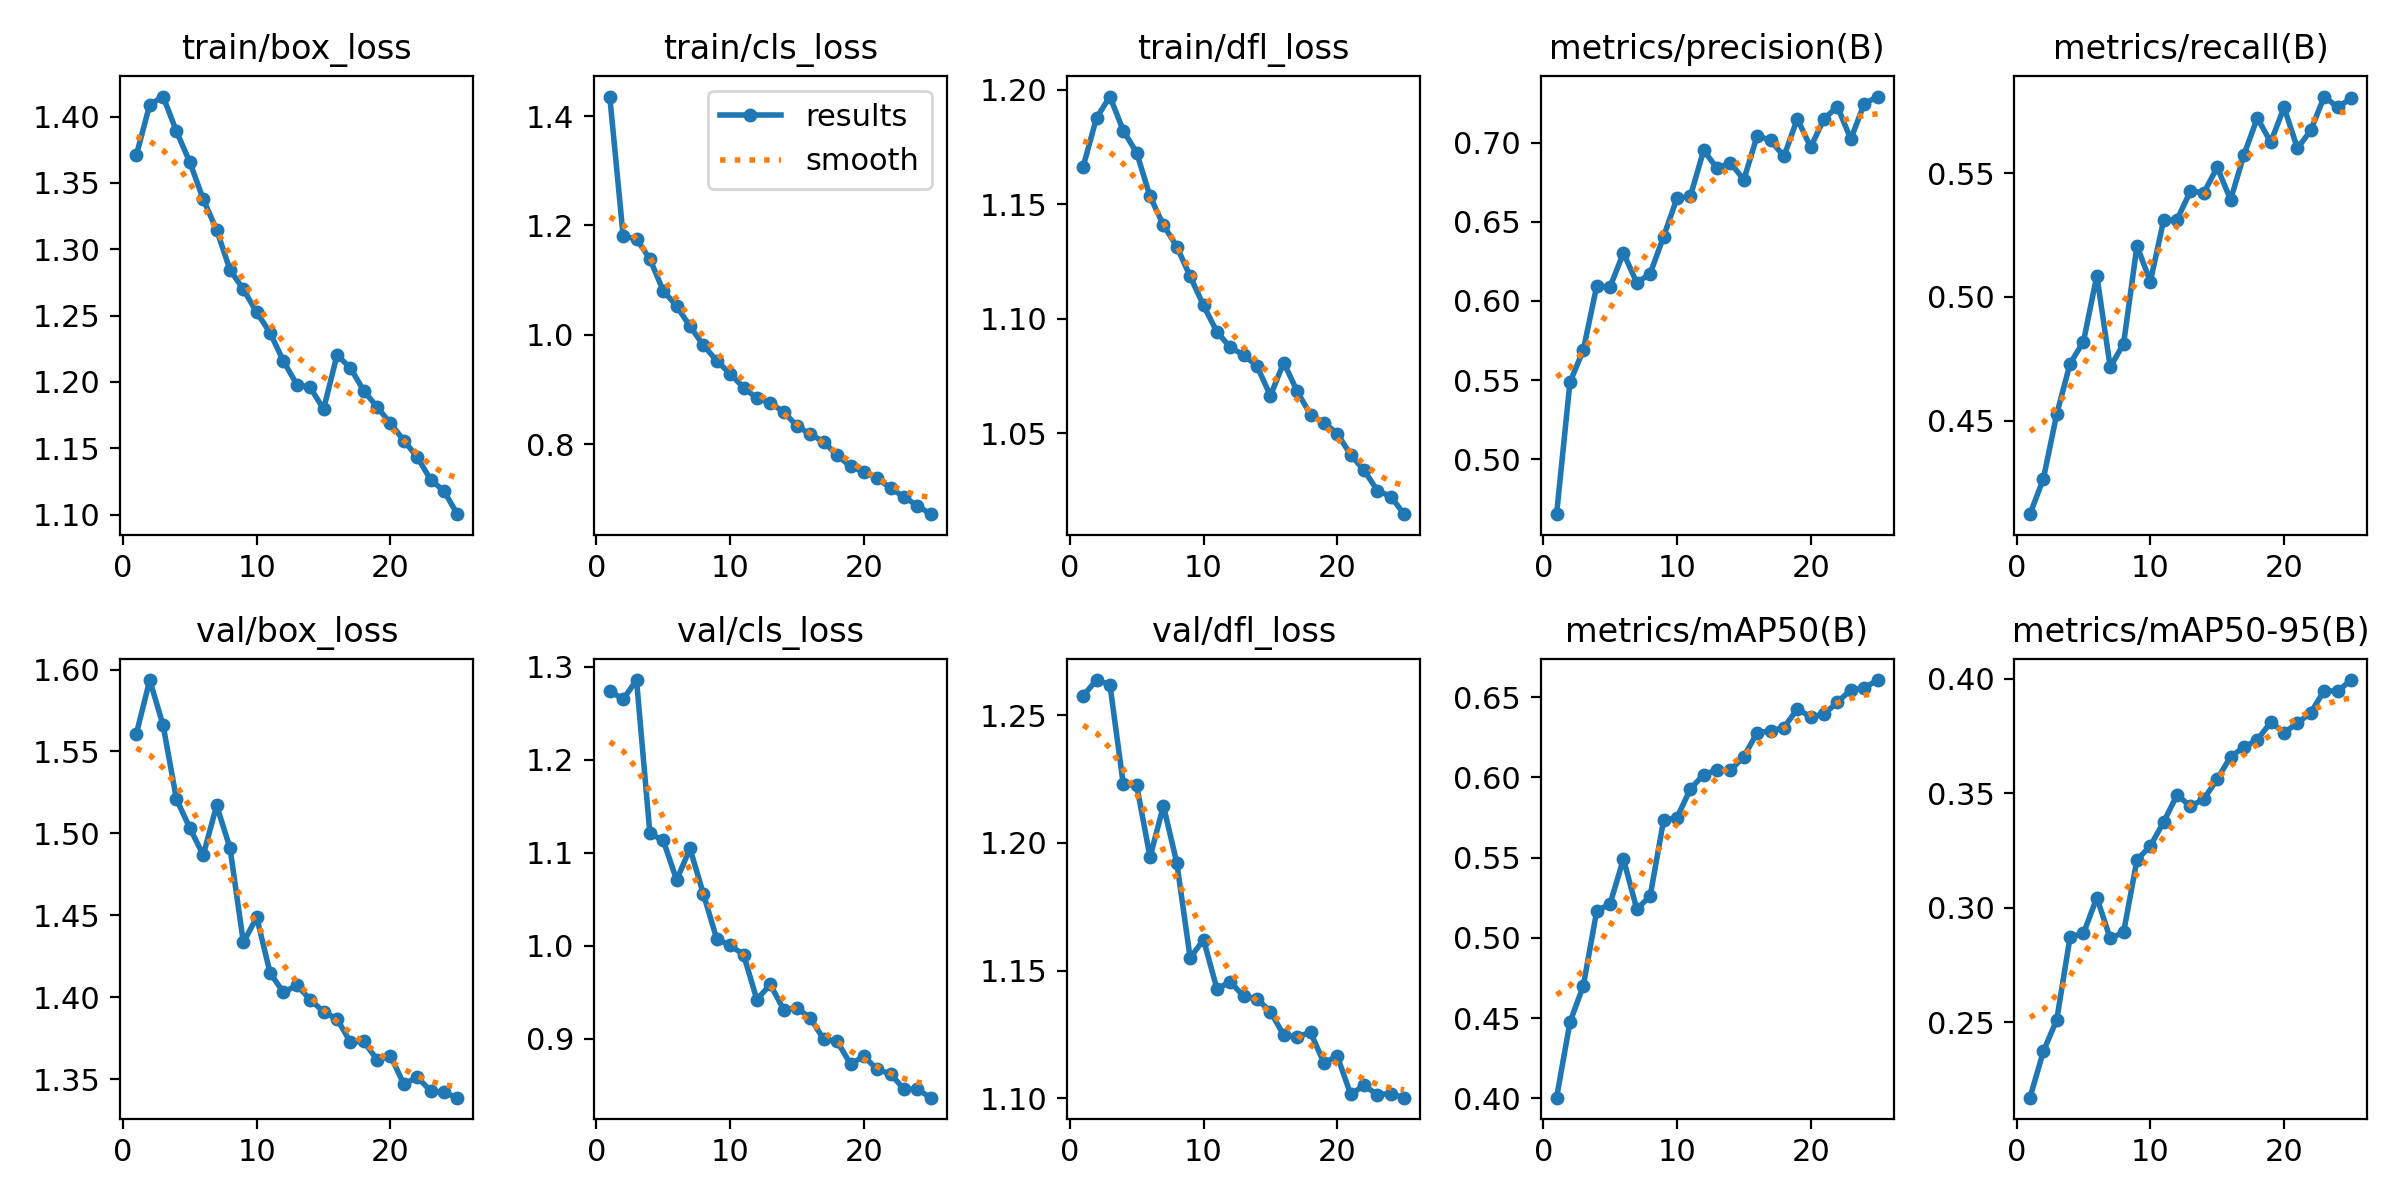

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/results.png', width=600)

/content


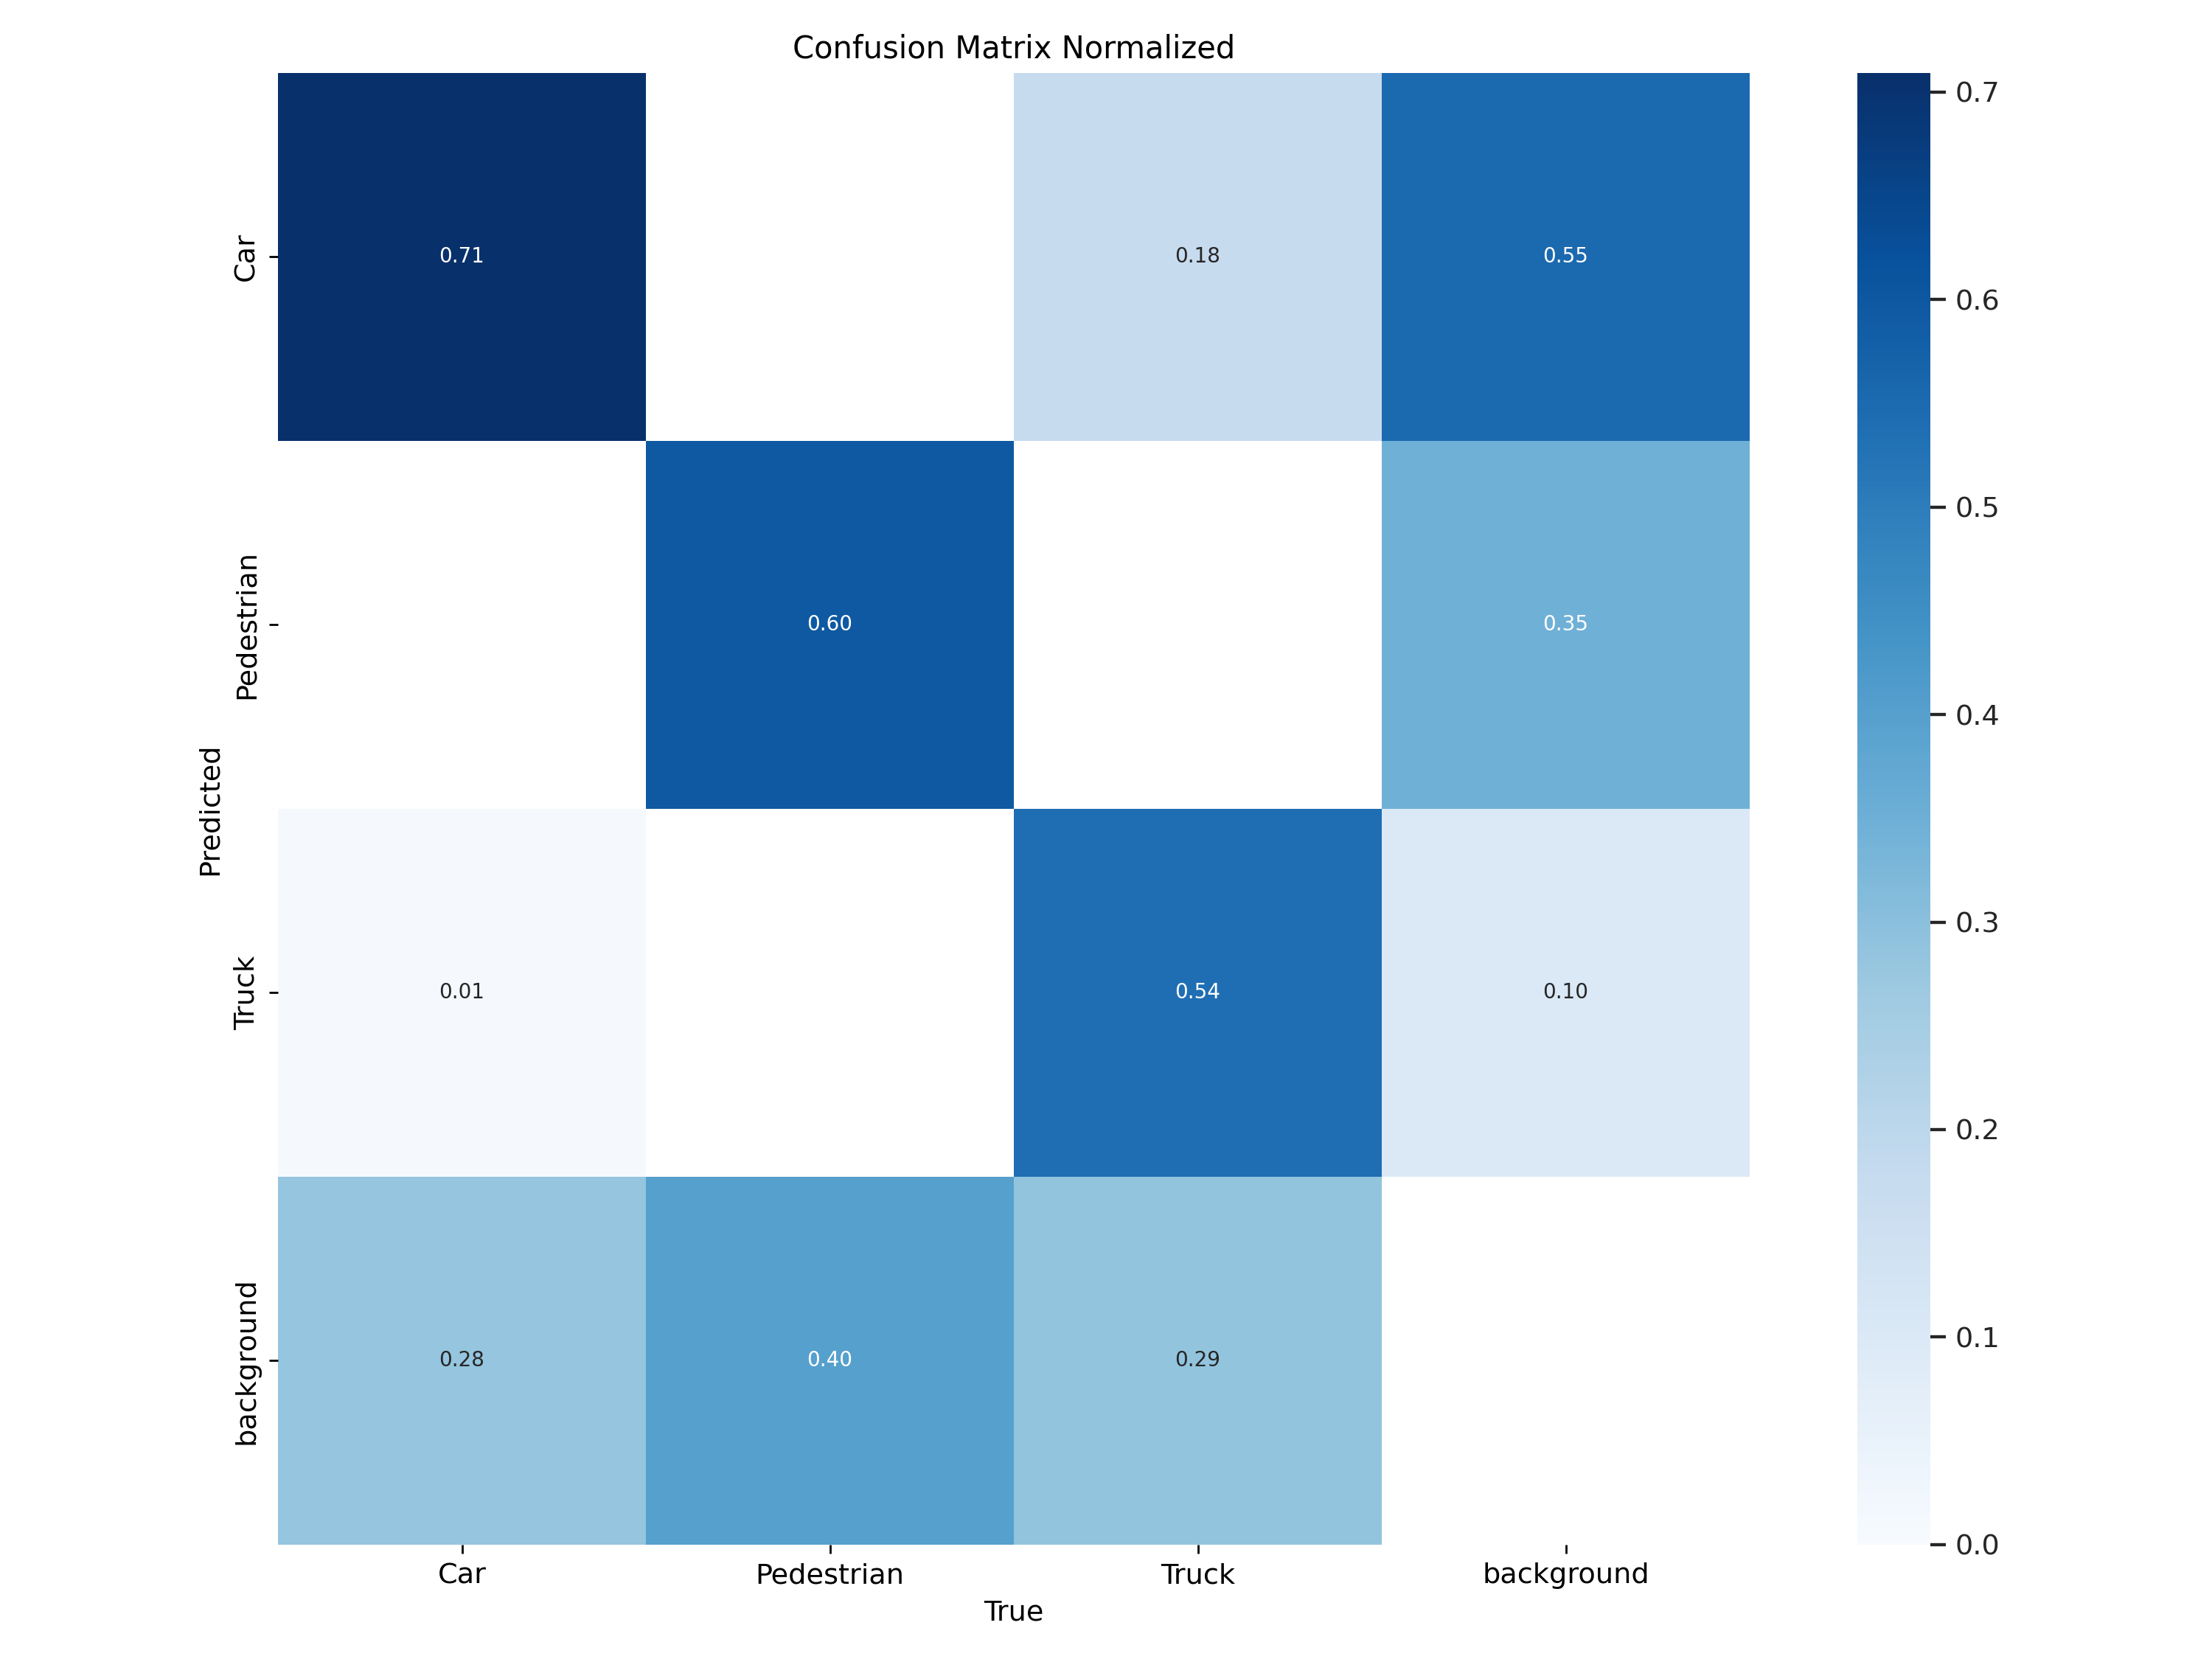

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png', width=600)

/content


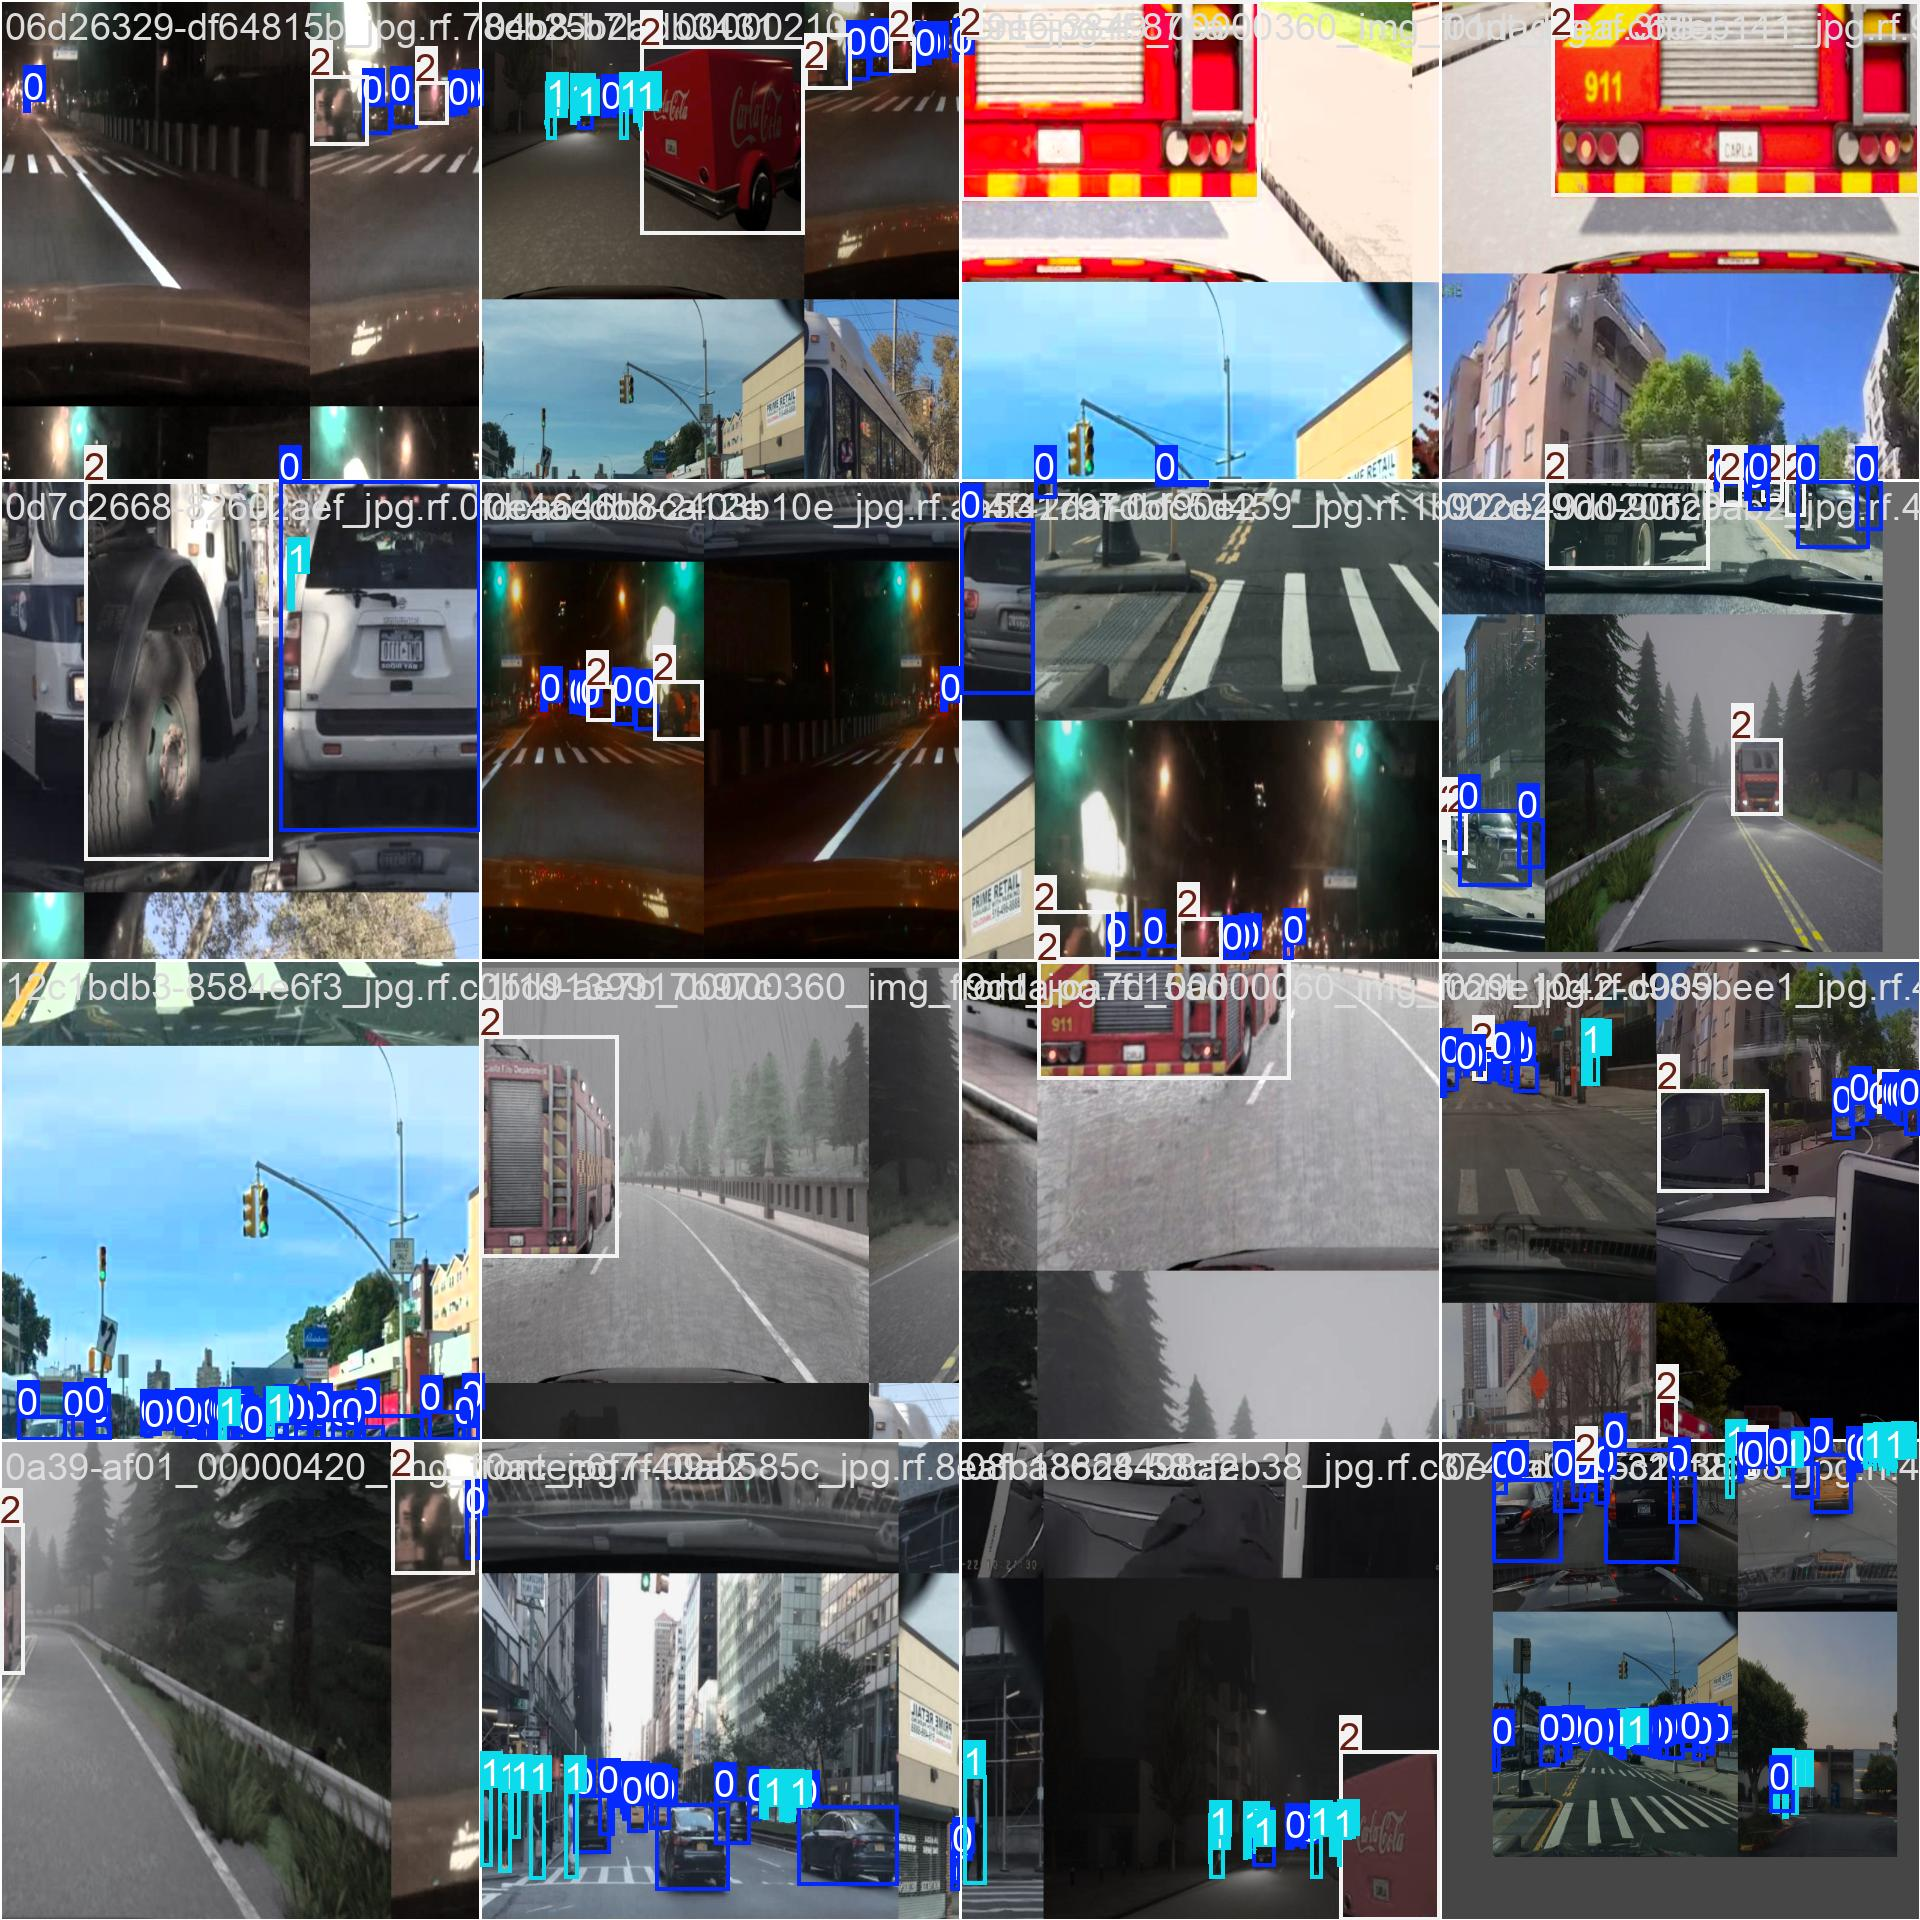

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/train_batch1.jpg', width=600)


5. TESTING MODEL

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 source=/content/car_detect/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

image 1/500 /content/car_detect/test/images/bcaf73c1-311f299e_jpg.rf.6f4cc7b6f9833f00efe7f644d769c016.jpg: 640x640 1 person, 2 cars, 1 traffic light, 16.5ms
image 2/500 /content/car_detect/test/images/bcaf73c1-e0c7165a_jpg.rf.15396ccdb93c63625ca6161366c18231.jpg: 640x640 1 person, 3 cars, 1 bus, 2 traffic lights, 16.5ms
image 3/500 /content/car_detect/test/images/bcbbfe2a-33e57bea_jpg.rf.8e5a03d2ba9fa0617f33017b568d5cb2.jpg: 640x640 2 persons, 13 cars, 2 trucks, 2 traffic lights, 16.4ms
image 4/500 /content/car_detect/test/images/bcbf4834-88a0b878_jpg.rf.97b164a4fc756c31d4c92f45475c212e.jpg: 640x640 3 cars, 3 buss, 16.4ms
image 5/500 /content/car_detect/test/images/bccd4f82-5c8f9f28_jpg.rf.d6e4bd701458b0f41cd09f131ceb8401.jpg: 640x640 2 persons, 2 cars, 4 trucks, 1 traffic light, 16.4ms
image 6/500 /conten

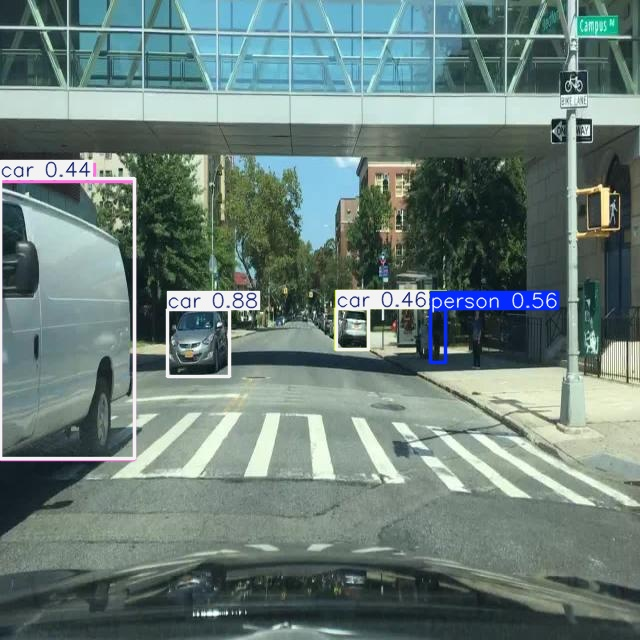

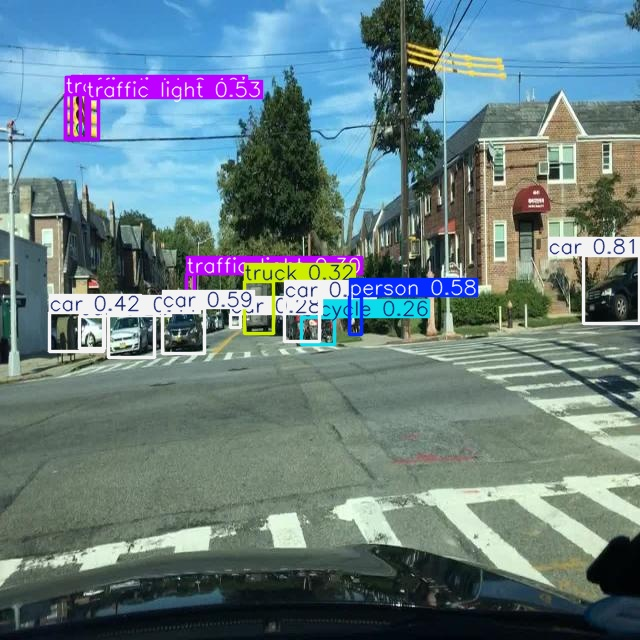

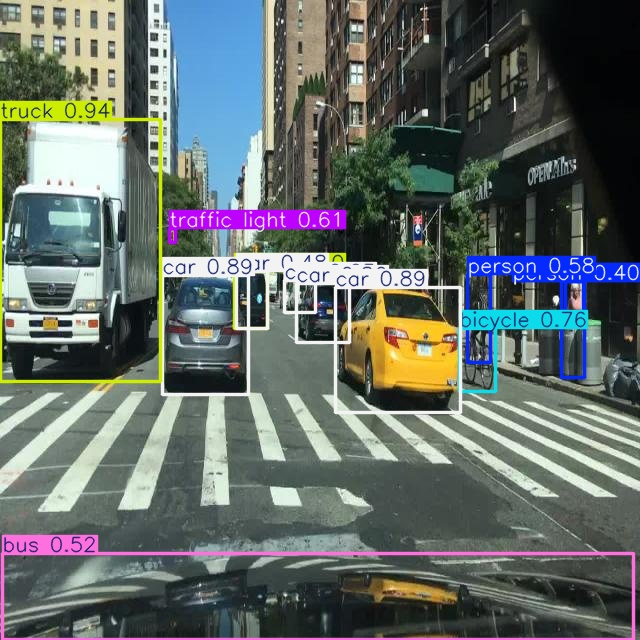

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")